#  Bagged Decision Trees (Bootstrap Aggregation)

##  What is Bagging?
**Bagging** (short for Bootstrap Aggregating) is an ensemble learning technique that improves the accuracy and stability of machine learning models by training multiple models on **different random subsets** of the data and **averaging their results**.

- It **reduces variance** (helps with overfitting).
- Commonly used with **high-variance, low-bias models** like **Decision Trees**.

---

##  How Does It Work?
1. **Create multiple subsets** of the original training data using **bootstrapping** (sampling with replacement).
2. Train a **separate model** (usually the same type, e.g., decision tree) on each subset.
3. For prediction:
   - In **classification**: use **majority vote** from all models.
   - In **regression**: use **average** prediction from all models.

---

##  Why Decision Trees?
- Decision Trees are **unstable** and sensitive to small changes in data (high variance).
- Bagging helps by combining many trees trained on varied data → makes prediction **more stable and accurate**.
- When combined with bagging, they become a **powerful ensemble**.

---

## Code Summary
In your code, you:
- Loaded the **Pima Indians Diabetes dataset**.
- Created **100 Decision Trees** using `BaggingClassifier`.
- Used **10-fold cross-validation** to evaluate the model.
- Printed the **mean accuracy** across all folds.

---

##  When to Use Bagging?
- When your base model (like decision trees) **overfits** the training data.
- When your dataset is:
  - Medium to large in size.
  - Contains **noise or outliers**.
  - Has **non-linear relationships** between variables.

---

##  Pros and Cons

### Pros:
- Reduces overfitting.
- Improves model stability.
- Simple to implement.

###  Cons:
- Slower due to multiple models.
- Less interpretable than a single tree.
- Doesn't help much if base model has low variance (e.g., linear regression).

---

##  Example Use Cases
- Medical diagnosis (e.g., diabetes prediction)
- Credit scoring / fraud detection
- Marketing campaign response prediction

---

 **Tip:** Bagging works best with algorithms that are **high variance**, like unpruned decision trees.



In [75]:
# Bagged Decision Trees for Classification

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# import warnings
# warnings.filterwarnings("ignore")

filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(estimator=cart, n_estimators=num_trees)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()*100.0)

76.67976760082024


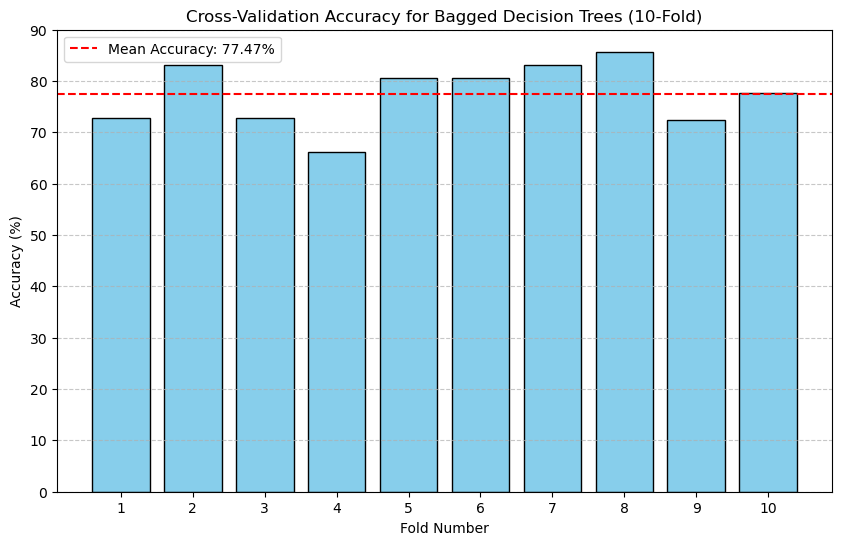

In [88]:
# Visualize cross-validation scores
# Create a bar plot to show the accuracy for each fold
plt.figure(figsize=(10, 6))
folds = range(1, 11)  # Fold numbers (1 to 10)
plt.bar(folds, results * 100, color='skyblue', edgecolor='black')
plt.axhline(y=results.mean() * 100, color='red', linestyle='--', label=f'Mean Accuracy: {results.mean() * 100:.2f}%')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validation Accuracy for Bagged Decision Trees (10-Fold)')
plt.xticks(folds)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

#  Random Forest Classifier

##  What is Random Forest?
**Random Forest** is an ensemble learning method that combines the predictions of multiple **decision trees** to improve classification (or regression) performance.

It is an advanced form of **Bagging** that also:
- Uses **random subsets of features** when splitting nodes in trees.
- Reduces **correlation** between individual trees → leads to **better generalization**.

---

##  How Does It Work?
1. Create multiple **bootstrap samples** (random rows with replacement) from the training set.
2. For each tree:
   - Select a **random subset of features** at each split (instead of all features).
   - Build a **decision tree** (usually unpruned).
3. For prediction:
   - Use **majority vote** in classification.
   - Use **mean** in regression.

---

## Code Summary
In code:
- You trained a **Random Forest Classifier** using the **Pima Indians Diabetes dataset**.
- Created a forest of **100 trees**.
- Set `max_features=3` (3 random features considered at each split).
- Evaluated model using **10-fold cross-validation**.
- Printed the **mean accuracy**.

---

##  Why Random Forest Works Well?
- It combats **overfitting** by using many diverse trees.
- It captures **non-linear relationships**.
- It handles **missing data** and **imbalanced datasets** better than individual trees.

---

##  When to Use It?
- For **medium to large** tabular datasets.
- When the data is **non-linear**, has **interactions** between features.
- Great for **binary/multiclass classification** or **regression** problems.

---

##  Pros and Cons

###  Pros:
- Very **accurate and powerful**.
- Works well without much parameter tuning.
- Handles **categorical and numerical features**.

###  Cons:
- Slower and more **memory-intensive** than single decision trees.
- Less **interpretable**.
- Doesn't perform well on very **high-dimensional sparse data** (e.g. text).

---

##  Example Use Cases
- Medical diagnosis (e.g., diabetes prediction)
- Credit risk assessment
- Customer churn prediction
- Image classification (with engineered features)

---

 **Tip:** Tune `n_estimators`, `max_features`, and `max_depth` for better performance.


In [77]:
#-- Random Forest Classification
#-- Model Type____Ensemble (Bagging + Random feature selection)
#Base Estimator_____Decision Tree


from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# import warnings
# warnings.filterwarnings("ignore")

filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)

#-- Model Configuration
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()*100.00)

77.46753246753248


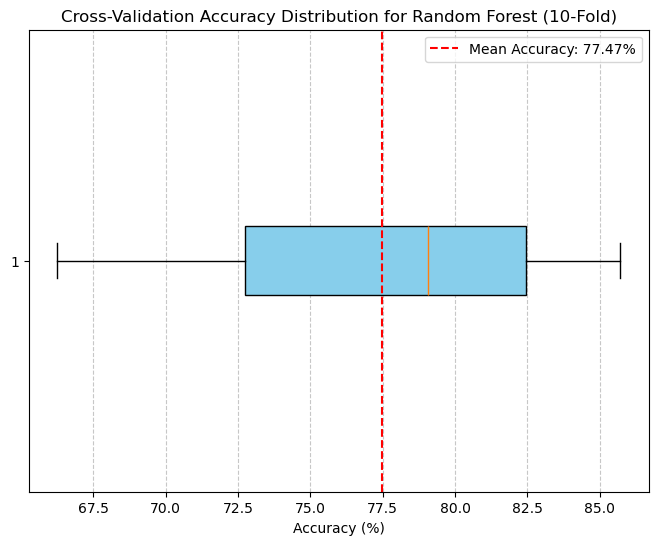

In [90]:
# Visualize cross-validation scores using a box plot
# The box plot shows the distribution of accuracy scores across the 10 folds
plt.figure(figsize=(8, 6))
plt.boxplot(results * 100, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.axvline(x=results.mean() * 100, color='red', linestyle='--', label=f'Mean Accuracy: {results.mean() * 100:.2f}%')
plt.xlabel('Accuracy (%)')
plt.title('Cross-Validation Accuracy Distribution for Random Forest (10-Fold)')
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

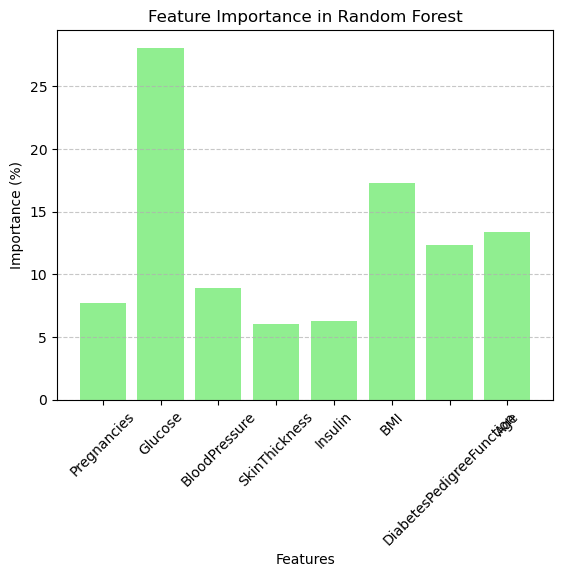

In [103]:
model.fit(X, Y)  # Fit the model to access feature importances
feature_names = dataframe.columns[:8]
importances = model.feature_importances_
plt.bar(feature_names, importances * 100, color='lightgreen')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

#  Extra Trees Classifier (Extremely Randomized Trees)

##  What is Extra Trees?
**Extra Trees (Extremely Randomized Trees)** is an ensemble method similar to Random Forest, but with **more randomization** during the training of individual trees.

It belongs to the **Bagging family** and improves accuracy and speed by increasing randomness in how trees are built.

---

##  Key Differences from Random Forest
| Feature | Random Forest | Extra Trees |
|--------|----------------|--------------|
| Feature split | Chooses best split | Chooses random split |
| Bootstrapping | Yes | Optional (often False) |
| Randomness | Moderate | High |

This higher randomness leads to **faster training** and often **better generalization**, especially on noisy datasets.

---

##  How Does It Work?
1. Like Random Forest, it creates multiple decision trees.
2. But when splitting nodes:
   - It selects random **feature subsets** (like RF).
   - And it chooses **random thresholds** (unlike RF).
3. Final prediction is:
   - **Majority vote** for classification.
   - **Average prediction** for regression.

---

##  Code Summary
In your code:
- You trained an **Extra Trees Classifier** on the **Pima Indians Diabetes dataset**.
- Created a forest of **100 trees**.
- Set `max_features=7` (7 random features used at each split).
- Used **10-fold cross-validation** to evaluate performance.
- Printed the **mean classification accuracy**.

---

##  When to Use Extra Trees?
- When the dataset is **noisy** or prone to overfitting.
- When you want a **faster** alternative to Random Forest.
- When you want **good accuracy** with **less tuning**.

---

##  Pros and Cons

###  Pros:
- Faster than Random Forest.
- More random = less overfitting.
- Works well with noisy data.

###  Cons:
- Even less interpretable than Random Forest.
- High randomness may reduce accuracy on some clean datasets.
- Not great for sparse, high-dimensional data.

---

##  Example Use Cases
- Medical diagnosis (e.g., diabetes classification)
- Intrusion detection in networks
- Real-time fraud detection
- Sensor data analysis

---

 **Tip:** Start with Extra Trees if your data is noisy or Random Forest overfits.


In [107]:
#-- Extra Trees Classification

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")

filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

num_trees = 100
max_features = 7
kfold = KFold(n_splits=10)

#-- Model Configuration
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()*100.00)

75.6390977443609


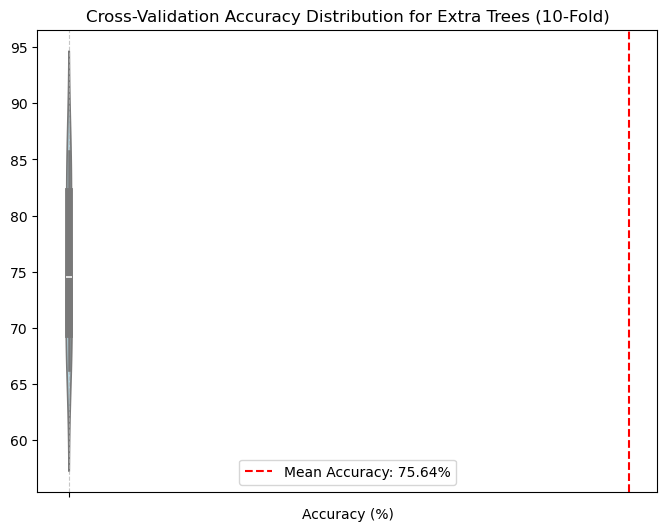

In [109]:
# Visualize cross-validation scores using a violin plot
# The violin plot shows the distribution of accuracy scores across the 10 folds
plt.figure(figsize=(8, 6))
sns.violinplot(data=results * 100, color='lightblue', inner='box')
plt.axvline(x=results.mean() * 100, color='red', linestyle='--', label=f'Mean Accuracy: {results.mean() * 100:.2f}%')
plt.xlabel('Accuracy (%)')
plt.title('Cross-Validation Accuracy Distribution for Extra Trees (10-Fold)')
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

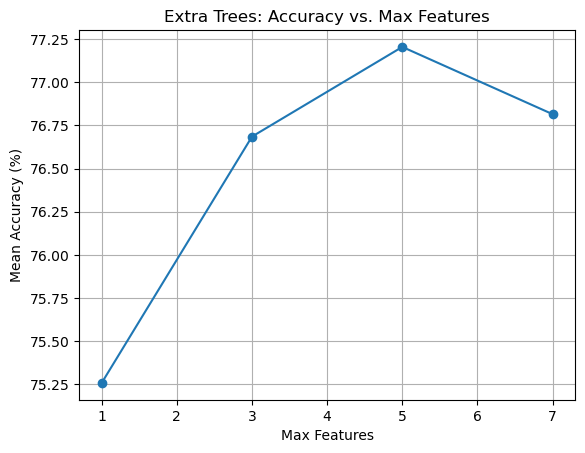

In [111]:
max_features_list = [1, 3, 5, 7]
mean_scores = []
for mf in max_features_list:
    model = ExtraTreesClassifier(n_estimators=100, max_features=mf)
    scores = cross_val_score(model, X, Y, cv=kfold)
    mean_scores.append(scores.mean() * 100)
plt.plot(max_features_list, mean_scores, marker='o')
plt.xlabel('Max Features')
plt.ylabel('Mean Accuracy (%)')
plt.title('Extra Trees: Accuracy vs. Max Features')
plt.grid(True)
plt.show()

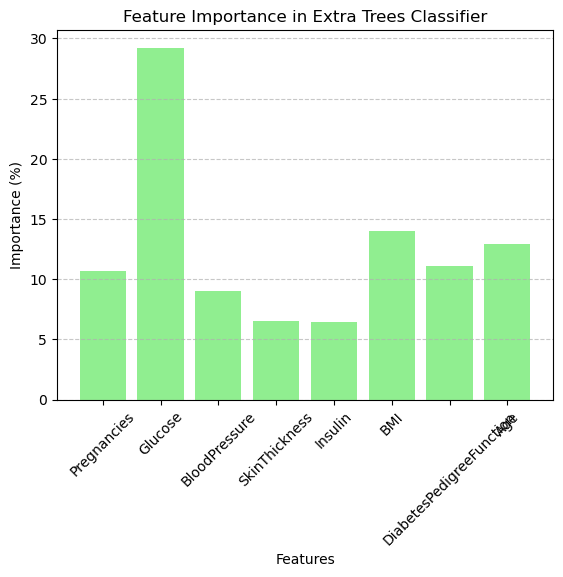

In [113]:
model.fit(X, Y)  # Fit the model to access feature importances
feature_names = dataframe.columns[:8]
importances = model.feature_importances_
plt.bar(feature_names, importances * 100, color='lightgreen')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.title('Feature Importance in Extra Trees Classifier')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

#  AdaBoost Classifier (Adaptive Boosting)

##  What is AdaBoost?
**AdaBoost (Adaptive Boosting)** is a popular **Boosting ensemble technique**. It combines multiple **weak learners** (typically decision trees with depth=1, called "stumps") into a single strong classifier.

Each new model focuses more on the **previously misclassified instances**, giving them **higher weight** during training.

---

##  How Does It Work?
1. Start with all samples having equal weights.
2. Train a weak learner (usually a shallow decision tree).
3. Increase weights of **misclassified** samples so the next model focuses more on them.
4. Combine all models using a **weighted majority vote**.
5. Repeat for `n_estimators` rounds (e.g., 30 times).

---

## Code Summary
In your code:
- You trained an **AdaBoostClassifier** using the **Pima Indians Diabetes dataset**.
- Used **30 estimators** (iterations).
- Evaluated model with **10-fold cross-validation**.
- Printed the **mean accuracy score**.

---

##  When to Use AdaBoost?
- When your base model (e.g., decision tree) is **underfitting**.
- When you want a **stronger model** without using deep trees.
- Works well on **clean, balanced data**.

---

##  Pros and Cons

###  Pros:
- Simple and effective.
- Often achieves **high accuracy**.
- Focuses on **hard-to-classify** examples.

###  Cons:
- Sensitive to **noisy data and outliers**.
- Slower than single models.
- Doesn't handle **imbalanced datasets** well unless modified.

---

##  Example Use Cases
- Spam email detection
- Credit scoring
- Medical condition classification
- Face detection

---

 **Tip:** Use AdaBoost with **shallow trees** as base estimators to get best results.  
You can change base model using `base_estimator` parameter.


In [24]:
#-- AdaBoost Classification

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# import warnings
# warnings.filterwarnings("ignore")

filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

num_trees = 30
kfold = KFold(n_splits=10)

#-- Model Configuration
model = AdaBoostClassifier(n_estimators=num_trees)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()*100.00)

76.04579630895421


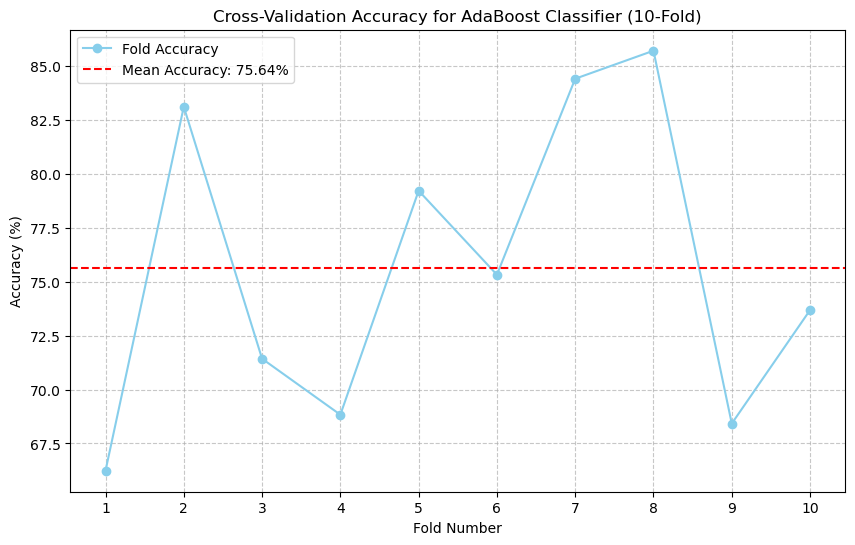

In [115]:
# Visualize cross-validation scores using a line plot
# The line plot shows the accuracy for each fold, with points connected to highlight trends
plt.figure(figsize=(10, 6))
folds = range(1, 11)  # Fold numbers (1 to 10)
plt.plot(folds, results * 100, marker='o', linestyle='-', color='skyblue', label='Fold Accuracy')
plt.axhline(y=results.mean() * 100, color='red', linestyle='--', label=f'Mean Accuracy: {results.mean() * 100:.2f}%')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validation Accuracy for AdaBoost Classifier (10-Fold)')
plt.xticks(folds)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

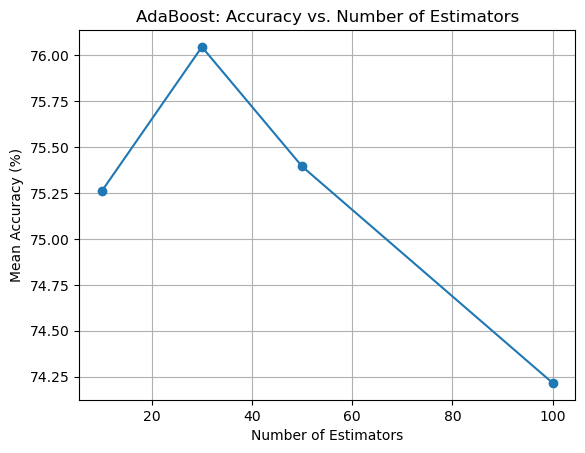

In [119]:
#Extending the Visualization:- To explore the effect of n_estimators, you can loop over different values and plot their mean accuracies:

estimator_counts = [10, 30, 50, 100]
mean_scores = []
for n in estimator_counts:
    model = AdaBoostClassifier(n_estimators=n)
    scores = cross_val_score(model, X, Y, cv=kfold)
    mean_scores.append(scores.mean() * 100)
plt.plot(estimator_counts, mean_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy (%)')
plt.title('AdaBoost: Accuracy vs. Number of Estimators')
plt.grid(True)
plt.show()

#  Stochastic Gradient Boosting (GradientBoostingClassifier)

##  What is Gradient Boosting?
**Gradient Boosting** is a powerful **Boosting ensemble technique** that builds models **sequentially**. Each new model tries to **correct the errors** made by the previous models by minimizing a loss function using **gradient descent**.

It creates **strong models** by combining multiple **weak learners**, usually decision trees.

---

##  What is “Stochastic” Gradient Boosting?
The “stochastic” part means it uses **random subsets** of the data (rows and/or columns) for training each tree. This adds **variance reduction**, similar to bagging, and helps **prevent overfitting**.

---

##  How Does It Work?
1. Fit the first model to the data.
2. Calculate the **error (residuals)** of the prediction.
3. Train the next model to predict these errors.
4. Add the predictions from all models (weighted by learning rate).
5. Repeat for `n_estimators` steps.

---

##  Code Summary
In your code:
- You trained a **Gradient Boosting Classifier** using the **Pima Indians Diabetes dataset**.
- Used **100 trees** (`n_estimators=100`).
- Evaluated the model with **10-fold cross-validation**.
- Printed the **mean classification accuracy**.

---

##  When to Use Gradient Boosting?
- When you need **high prediction accuracy**.
- When data has **complex patterns** or **non-linearities**.
- When you can tolerate longer training times for better results.

---

##  Pros and Cons

###  Pros:
- Very **accurate and powerful**.
- Handles **both classification and regression**.
- Good with **non-linear and complex data**.

###  Cons:
- Slower to train than Random Forest.
- Can **overfit** if not properly tuned.
- Requires **careful tuning** of hyperparameters (e.g., learning rate, max depth).

---

##  Example Use Cases
- Disease prediction (e.g., diabetes, heart disease)
- Ranking problems (e.g., search engines)
- Fraud detection
- Insurance risk scoring

---

 **Tip:** Tune parameters like `learning_rate`, `max_depth`, and `subsample` for better performance.


In [26]:
# Stochastic Gradient Boosting Classification/

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# import warnings
# warnings.filterwarnings("ignore")

filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

num_trees = 100
kfold = KFold(n_splits=10)

#-- Model Configuration
model = GradientBoostingClassifier(n_estimators=num_trees)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()*100.00)

76.81989063568012


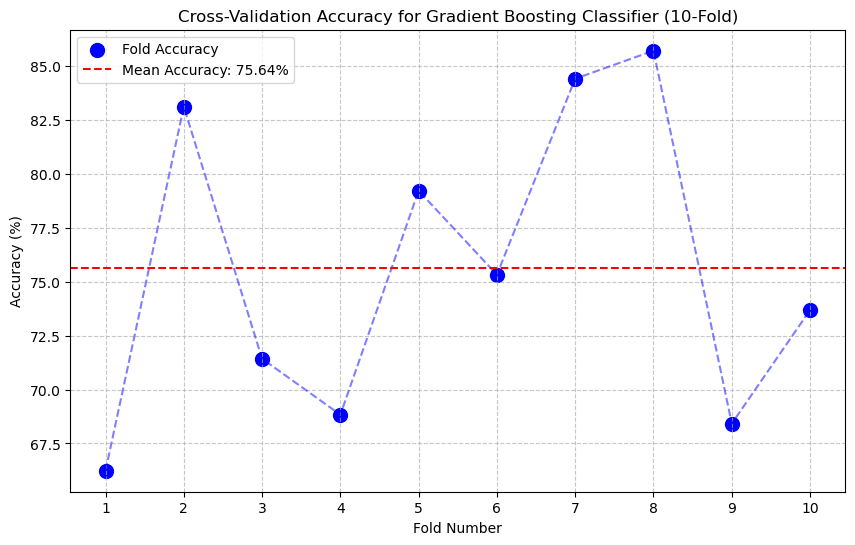

In [124]:
# Visualize cross-validation scores using a scatter plot
# The scatter plot shows the accuracy for each fold, with a trend line to highlight variability
plt.figure(figsize=(10, 6))
folds = range(1, 11)  # Fold numbers (1 to 10)
plt.scatter(folds, results * 100, color='blue', s=100, label='Fold Accuracy')
plt.plot(folds, results * 100, linestyle='--', color='blue', alpha=0.5)  # Trend line
plt.axhline(y=results.mean() * 100, color='red', linestyle='--', label=f'Mean Accuracy: {results.mean() * 100:.2f}%')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validation Accuracy for Gradient Boosting Classifier (10-Fold)')
plt.xticks(folds)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

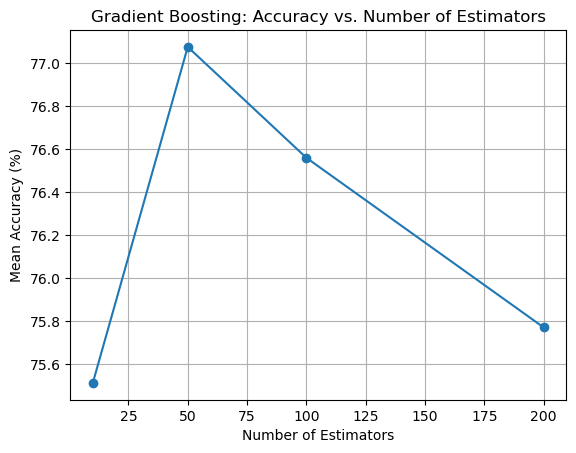

In [126]:
estimator_counts = [10, 50, 100, 200]
mean_scores = []
for n in estimator_counts:
    model = GradientBoostingClassifier(n_estimators=n)
    scores = cross_val_score(model, X, Y, cv=kfold)
    mean_scores.append(scores.mean() * 100)
plt.plot(estimator_counts, mean_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy (%)')
plt.title('Gradient Boosting: Accuracy vs. Number of Estimators')
plt.grid(True)
plt.show()

#  Voting Ensemble Classifier

##  What is Voting Ensemble?
**Voting Ensemble** is a simple and powerful technique that combines the predictions of multiple **different models** (e.g., logistic regression, decision tree, SVM) to make a final prediction.

There are two main types of voting:
- **Hard Voting**: Uses **majority class** from all models.
- **Soft Voting**: Uses the **average of predicted probabilities** (requires probability outputs).

---

##  How Does It Work?
1. Train multiple **diverse classifiers** (called base models).
2. For a new instance, get predictions from all models.
3. Combine their results:
   - Hard voting → pick the class most voted.
   - Soft voting → average probabilities and choose the highest one.

---

## Code Summary
In your code:
- You used **3 different classifiers**:
  - `LogisticRegression` (linear)
  - `DecisionTreeClassifier` (non-linear)
  - `SVC` (non-linear, margin-based)
- You wrapped them inside a `VotingClassifier`.
- Used **10-fold cross-validation** to evaluate performance.
- Printed the **average accuracy** across all folds.

---

##  When to Use Voting Classifier?
- When you have **different models** capturing **different patterns**.
- When individual models are not strong enough alone.
- Great when you want a **balance of bias and variance**.

---

##  Pros and Cons

###  Pros:
- Easy to implement.
- Can boost performance with minimal tuning.
- Combines the strengths of different models.

###  Cons:
- May not perform well if base models are weak or similar.
- Requires models with **complementary strengths**.
- Soft voting requires all models to support **probability outputs**.

---

##  Example Use Cases
- Any **classification task** where no single model performs best.
- Tabular datasets (medical, finance, etc.).
- When you want to **stabilize** predictions across diverse models.

---

 **Tip:** For better results, use **Soft Voting** by setting `VotingClassifier(..., voting='soft')` **and ensure all models support `predict_proba()`**.


In [46]:
#-- Voting Ensemble for Classification

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

# import warnings
# warnings.filterwarnings("ignore")
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('SVC', model3))

print(estimators)

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean()*100.00)

[('logistic', LogisticRegression()), ('cart', DecisionTreeClassifier()), ('SVC', SVC())]
76.29870129870129


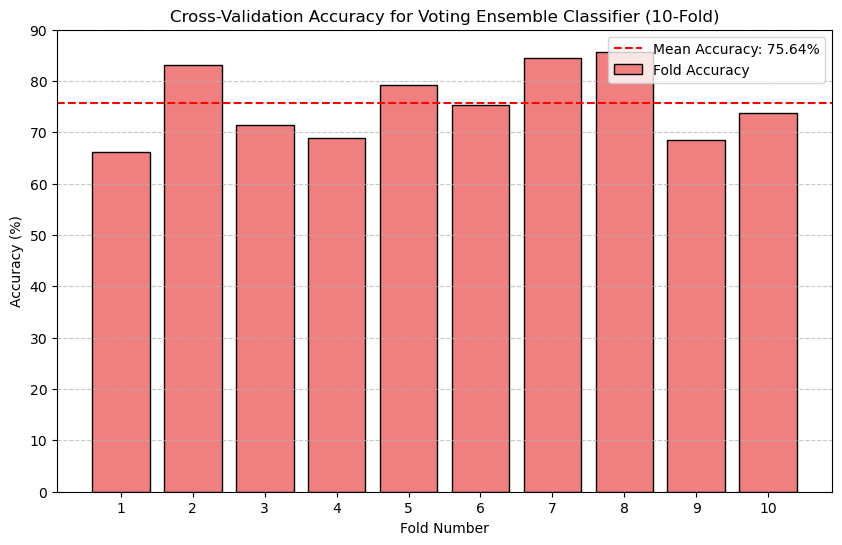

In [130]:
# Visualize cross-validation scores using a bar plot
# The bar plot shows the accuracy for each fold, with the mean accuracy highlighted
plt.figure(figsize=(10, 6))
folds = range(1, 11)  # Fold numbers (1 to 10)
plt.bar(folds, results * 100, color='lightcoral', edgecolor='black', label='Fold Accuracy')
plt.axhline(y=results.mean() * 100, color='red', linestyle='--', label=f'Mean Accuracy: {results.mean() * 100:.2f}%')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validation Accuracy for Voting Ensemble Classifier (10-Fold)')
plt.xticks(folds)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

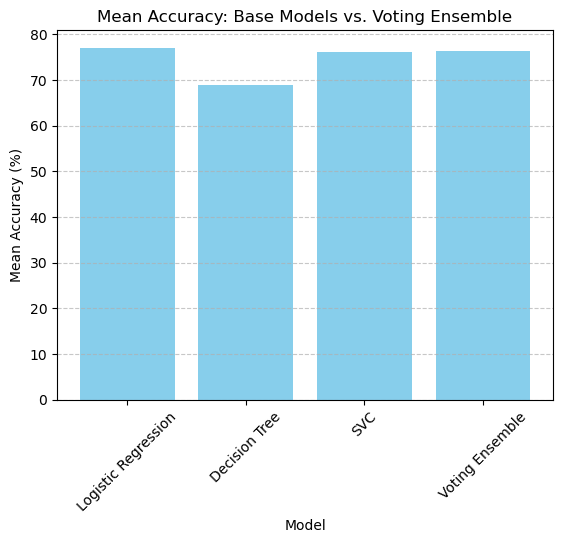

In [132]:
model_names = ['Logistic Regression', 'Decision Tree', 'SVC', 'Voting Ensemble']
mean_scores = []
for name, model in estimators:
    scores = cross_val_score(model, X, Y, cv=kfold)
    mean_scores.append(scores.mean() * 100)
scores = cross_val_score(ensemble, X, Y, cv=kfold)
mean_scores.append(scores.mean() * 100)
plt.bar(model_names, mean_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy (%)')
plt.title('Mean Accuracy: Base Models vs. Voting Ensemble')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

#  Grid Search for Ridge Regression (Hyperparameter Tuning)

##  What is Grid Search?
**Grid Search** is a brute-force method used to **tune hyperparameters** by trying all possible combinations from a predefined set and selecting the one that gives the **best cross-validation score**.

---

##  Code Summary
In your code:
- You performed **hyperparameter tuning** for the `alpha` parameter of **Ridge Regression**.
- Used `GridSearchCV` from `scikit-learn` to evaluate different alpha values.
- Evaluated model performance using **cross-validation**.
- Printed the best score and the optimal value of alpha.

---

##  What is Ridge Regression?
- Ridge Regression is a **linear regression** technique with **L2 regularization**.
- It **adds a penalty** to the loss function to prevent overfitting.
- The strength of the penalty is controlled by **`alpha`**:
  - Large alpha → more regularization → simpler model.
  - Small alpha → less regularization → may overfit.

---

##  How Grid SearchCV Works
1. Takes a model and a dictionary of parameters (`param_grid`).
2. Trains the model using all combinations of hyperparameters.
3. Uses **cross-validation** (default is 5-fold) to evaluate each combination.
4. Returns the best model and corresponding score.

---

##  Parameters Tuned
```python
param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]}


In [52]:
#-- Grid Search for Algorithm Tuning (Hyperparameter Optimization)
#-- This code performs hyperparameter tuning for Ridge Regression using different 'alpha' values.
#-- We use GridSearchCV to try all combinations and find the best performing one based on cross-validation score.

import numpy as np
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# import warnings
# warnings.filterwarnings("ignore")

filename = 'diabetes.csv'
dataframe = read_csv(filename)

#-- Separate features and target variable
array = dataframe.values
X = array[:,0:8] #-- Input features
Y = array[:,8] #-- Target variable (0 = No diabetes, 1 = Diabetes)

#-- Define different alpha values to test
alphas = numpy.array([1, 0.1, 0.01, 0.001, 0.0001, 0])
param_grid = dict(alpha=alphas)

# print(param_grid)

#-- Ridge Regression model
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print("Best Score (Cross-Validated Accuracy):", 100*grid.best_score_)
print("Best Alpha Value:", grid.best_estimator_.alpha)

Best Score (Cross-Validated Accuracy): 27.61084412929244
Best Alpha Value: 1.0


In [68]:
#-- Grid Search for Ridge regression (L2 Regularization) Algorithm Tuning
#-- Using Ridge Regression, we regularize the linear regression model to reduce overfitting, And using GridSearchCV,
#-- we find the best value for the hyperparameter called alpha that maximizes the model's performance.

import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV 

filename = 'boston.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

alphas = numpy.array([1,0.99,0.7,0.3,0.2,0.1, 0.005,0])  #-- Candidate alpha values for regularization strength
param_grid = dict(alpha=alphas)  #-- Create parameter grid for GridSearchCV

model = Ridge()  #-- Initialize Ridge Regression model
grid = GridSearchCV(estimator=model, param_grid=param_grid)  #-- Setup Grid Search for tuning alpha
grid.fit(X, Y)  #-- Fit model and perform grid search

#-- Print mean test scores and ranking for each alpha value tested
for i in ['mean_test_score', 'rank_test_score']:
    print(i, " : ", grid.cv_results_[i])

print(100.00 * grid.best_score_)  #-- Best cross-validation score achieved
print(grid.best_estimator_.alpha)  #-- Alpha value that gave best score


mean_test_score  :  [0.38921758 0.38906616 0.38379378 0.37163643 0.36689747 0.36095293
 0.35371247 0.35327592]
rank_test_score  :  [1 2 3 4 5 6 7 8]
38.921758241024094
1.0


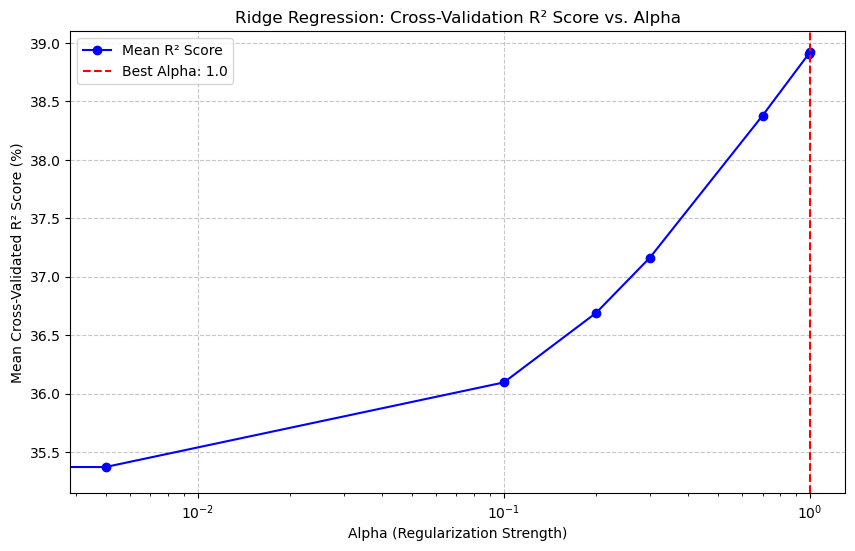

In [136]:
# Visualize cross-validation scores for each alpha value
# The line plot shows how R² scores vary with alpha, with the best score highlighted
plt.figure(figsize=(10, 6))
mean_scores = grid.cv_results_['mean_test_score'] * 100  # Convert to percentage
plt.plot(alphas, mean_scores, marker='o', linestyle='-', color='blue', label='Mean R² Score')
plt.axvline(x=grid.best_estimator_.alpha, color='red', linestyle='--', label=f'Best Alpha: {grid.best_estimator_.alpha}')
plt.xscale('log')  # Log scale for alpha due to wide range of values
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Cross-Validated R² Score (%)')
plt.title('Ridge Regression: Cross-Validation R² Score vs. Alpha')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#  Randomized Search for Ridge Regression (Hyperparameter Tuning)

##  What is Randomized Search?
**RandomizedSearchCV** is an efficient alternative to Grid Search that **samples a fixed number of random combinations** from the hyperparameter space instead of exhaustively trying all combinations.

It’s especially useful when:
- The search space is large.
- You want faster results with fewer model evaluations.

---

##  What is Ridge Regression?
- Ridge Regression is a **linear regression model with L2 regularization**.
- It penalizes large coefficients to prevent overfitting.
- The **strength of penalty** is controlled by the `alpha` parameter.

---

##  Your Code Summary
In your code:
- You performed **hyperparameter tuning** for `alpha` in Ridge Regression.
- Used `RandomizedSearchCV` to **randomly sample** alpha values from a **uniform distribution**.
- Ran the search for **100 iterations**.
- Evaluated performance using **cross-validation**.
- Printed the best cross-validated score and the best `alpha`.

---

##  Key Code Concepts
```python
param_grid = {'alpha': uniform()}  # Random alpha values between 0 and 1
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)


In [64]:
# Randomized Search for Algorithm Tuning

import numpy  
from pandas import read_csv  
from scipy.stats import uniform  #-- For generating random values from uniform distribution
from sklearn.linear_model import Ridge  #-- Ridge Regression model
from sklearn.model_selection import RandomizedSearchCV  #-- Randomized hyperparameter tuning



filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]


param_grid = {'alpha': uniform()}  #-- Alpha values sampled randomly from uniform distribution between 0 and 1

model = Ridge()  #-- Initialize Ridge Regression model

rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)  #-- Randomized Search with 100 iterations

rsearch.fit(X, Y)  #-- Fit model and search for best alpha

print("Best score:", 100.00*rsearch.best_score_)  #-- Best cross-validation score
print("Best alpha value:", rsearch.best_estimator_.alpha)  #-- Best alpha parameter found

Best score: 27.610785604992355
Best alpha value: 0.9854180799107559


In [66]:
# Randomized Search for Ridge Regression (L2 Regularization) Algorithm Tuning

import numpy
from pandas import read_csv
from scipy.stats import uniform  #-- forgot to import this in your code
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

filename = 'boston.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]


param_grid = {'alpha': uniform()}  #-- alpha sampled randomly from uniform(0,1)
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X, Y)

print("Best score:", 100.00*rsearch.best_score_)
print("Best alpha value:", rsearch.best_estimator_.alpha)

Best score: 38.91730105398874
Best alpha value: 0.9970450605297573


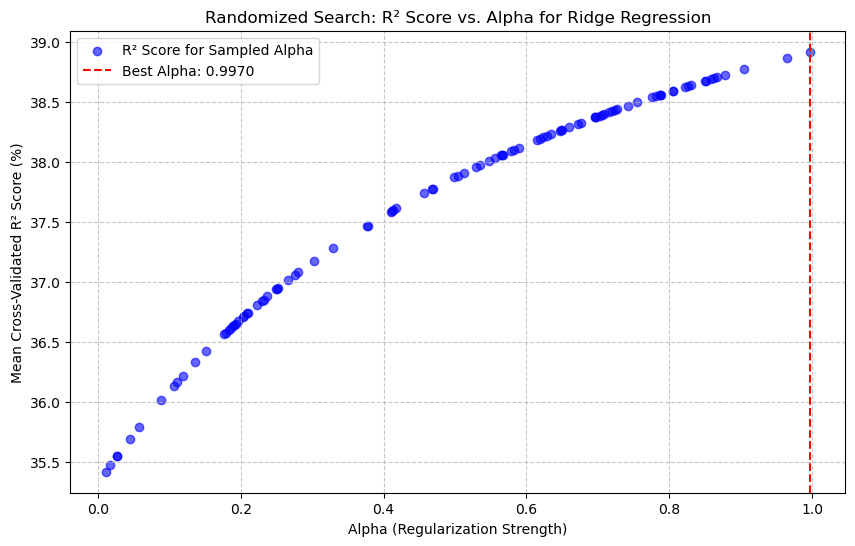

In [140]:
# for diabetes dataset data visualization
# Visualize cross-validation scores for sampled alpha values
# The scatter plot shows R² scores vs. alpha, with the best alpha highlighted
plt.figure(figsize=(10, 6))
alphas = [params['alpha'] for params in rsearch.cv_results_['params']]  # Extract sampled alphas
mean_scores = rsearch.cv_results_['mean_test_score'] * 100  # Convert R² scores to percentage
plt.scatter(alphas, mean_scores, color='blue', alpha=0.6, label='R² Score for Sampled Alpha')
plt.axvline(x=rsearch.best_estimator_.alpha, color='red', linestyle='--', label=f'Best Alpha: {rsearch.best_estimator_.alpha:.4f}')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Cross-Validated R² Score (%)')
plt.title('Randomized Search: R² Score vs. Alpha for Ridge Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

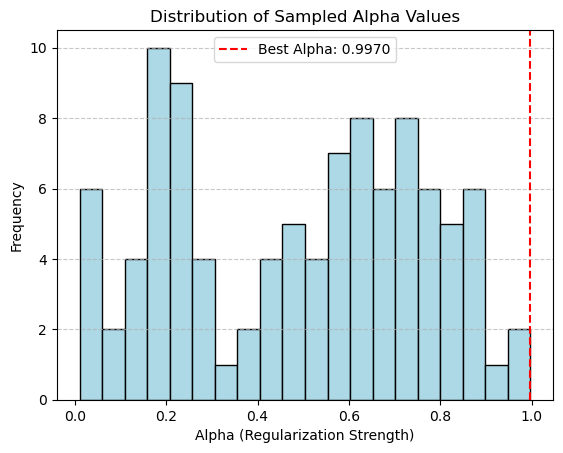

In [146]:
# for diabetes dataset data visualization
plt.hist(alphas, bins=20, color='lightblue', edgecolor='black')
plt.axvline(x=rsearch.best_estimator_.alpha, color='red', linestyle='--', label=f'Best Alpha: {rsearch.best_estimator_.alpha:.4f}')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Frequency')
plt.title('Distribution of Sampled Alpha Values')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()